
# Udacity DAND Project: Investigate a Dataset 

# No-Shows for Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### Dataset: [No-show Appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

#### About this dataset: 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, as well as details about the appointments made by the patient. 

Here is a description of the variables contained in this dataset:

**PatientID**: Identification number for patient  
**AppointmentID**: Identification number for appointment  
**Gender**: Male or Female  
**ScheduledDay**: The date and time patient set up their appointment (this is before appointment of course)  
**AppointmentDay**: The date and time of actual appointment  
**Age**: Age of patient  
**Neighborhood**: Indicates location of the hospital  
**Scholarship**:  indicates whether or not the patient is enrolled in Brasilian welfare program 
[Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Família) (1=Yes, 0=No)   
**Hipertension**: Indicates whether a patient is experiencing Hypertension (1=Yes, 0=No)  
**Diabetes**: Indicates whether a patient is experiencing Diabetes (1=Yes, 0=No)  
**Alcoholism**: Indicates whether a patient is experiencing Alcoholism (1=Yes, 0=No)  
**Handcap**: Indicates whether a patient is handicapped (1=Yes, 0=No)  
**SMS_received**: Indicates whether a patient received a text message reminder about their appointment (1=Yes, 0=No)  
**No-show**: Indicates whether a patient showed up for appointment (Yes = No-show, No = Show) 

### Research Questions

My target variable (variable I am attempting to predict) is the **No-show**, i.e. whether a patient shows up for their medical appointment or not.   

My analysis will be split into using personal characteristics (patient attributes) and non-patient attributes.  

**Effect of Patient Attributes**:  
-  What is the effect of age on whether a patient shows up for an appointment ?  
-  Does gender have an impact on appointment attendance? Do females care more about their health than men do?  
-  Do patients that are diagnosed with certain conditions (hypertension, alcoholism, handicap, diabetes) tend to show up to their appointments?

**Effect of Non-Patient Attributes**:  
In order to help hospitals improve their administrative services, I will ask the following question:  

- Do SMS reminders decrease the proportion of missed appointments?





In [829]:
# First, import all the packages that I plan to use in my analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#date in Python is not a datatype of its own, but we can import a module named "datetime" to work with dates as date objects
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

Prior to any analysis, I will load the data, check the data for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties (Data Assessment)

In [830]:
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [831]:
#get the dimensions of my dataset
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 110527
Number of columns 14


In [832]:
#get a concise summary of dataframe, including number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [833]:
#alternatively, can check for null values in each column in this way
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [834]:
#check the datatypes (or can check using df.info(), see above)
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [835]:
#check for any duplicates
sum(df.duplicated())

0

In [836]:
#get value counts for each of the columns in the dataframe, to ensure no errors in data
columns_interest=['Gender','Scholarship','Hipertension','Alcoholism','Diabetes','Handcap','SMS_received','No-show']
for col in columns_interest:
    print(df[col].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64
0    99666
1    10861
Name: Scholarship, dtype: int64
0    88726
1    21801
Name: Hipertension, dtype: int64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
0    75045
1    35482
Name: SMS_received, dtype: int64
No     88208
Yes    22319
Name: No-show, dtype: int64


In [837]:
#check summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [838]:
#get number of unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Assessment Conclusions

After doing an assessment of the data, I came to the following conclusions:

1. The dataset has 110,527 rows and 14 columns.
2. PatientId has a "float" datatype; it should be changed to an integer. However, PatientId and AppointmentId will not be used in my analysis, and therefore will be dropped.
3. ScheduledDay and AppointmentDay are of type "object" (i.e. string) and ideally, should be converted to Datetime in case we need to perform calculations on those. 
4. No-show should be converted to a binary variable (0, 1) for the purposes of our anaylysis.
5. Handcap has 5 unique values (0,1,2,3,4), instead of 2 (0,1,2), and I need to look further into that. 
6. There are no null values.
7. There are no duplicates.
8. The table of descriptive stats showed a minimum Age of -1 and a maximum of 115, which I will look into.
9. To simplify things, columns names will all be changed to lower case, and those composed of two parts will have an underscore as a separator.
10. Unique values for PatientId are lesss than unique values for AppointmentId, which means that in this dataset, AppointmentId is the unique identifier for each entry.

### Data Cleaning 

In [839]:
# drop PatientId and AppointmentId

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [840]:
#convert ScheduledDay and AppointmentDay to Datetime type using Pandas Datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [841]:
#convert "No-show" to a binary variable (0=No, 1=Yes), i.e. (0=Showed up, 1=Did not show up)
df['No-show']=df['No-show'].map({'Yes':1, 'No':0})
print(df['No-show'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: No-show, dtype: int64


In [842]:
#as we saw during inspection, Handcap have 4 values instead of 2
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

This might mean that there are several degrees of Handicap. For our purposes, we can covnert values 1,2,3,4 into 1, to make the variable binary.

In [843]:
#convert to boolean
df['Handcap']=df['Handcap'].astype('bool')
print(df['Handcap'].value_counts())

#convert back to 0,1
df['Handcap']=df['Handcap'].astype('int')
print(df['Handcap'].value_counts())

False    108286
True       2241
Name: Handcap, dtype: int64
0    108286
1      2241
Name: Handcap, dtype: int64


As I saw earlier during inspection of the dataset, the minimum Age was -1 and maximum age is 115, so I need to inspect further, and see whether I need to drop the row containing those odd age entries.

In [844]:
df.query('Age==-1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


In [845]:
#since it is just one entry, we can drop that row
df.drop([99832],inplace=True)

In [846]:
df.query('Age==115')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
63915,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
68127,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,1
76284,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,0
97666,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,0


I will drop rows with age = 115.

In [847]:
df.drop([63912],inplace=True)
df.drop([63915],inplace=True)
df.drop([68127],inplace=True)
df.drop([76284],inplace=True)
df.drop([97666],inplace=True)

In [848]:
#check if rows were deleted
df.query('Age==115')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [849]:
#change all the columns to lower case to simplify things
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0


In [850]:
#add underscores

df.rename(columns={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day','no-show':'no_show'},inplace=True)
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0


Since the Patient and Appointment IDs were dropped, we need to check again whether there are duplicate entries, as there might be duplicate scheduled appointments.

In [851]:
sum(df.duplicated())

634

We can see that there are 635 duplicate rows, which means that some appointments were scheduled at the exact same date, hour, minute and second. This is odd. This is most probably a fault in the computer system, where one appointment was entered several times but given a different ID each time. Since the number of duplicates is small compared to the total number of rows, then we can drop these dplicates.   
But first, let us check the distribution of scheduled appointments. 

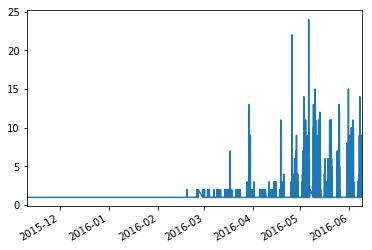

In [852]:
df.scheduled_day.value_counts().plot()

Let's drop the duplicates and check whether the distribution was significantly affected.

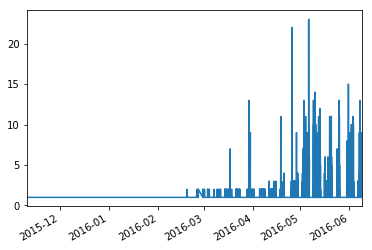

In [853]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.scheduled_day.value_counts().plot()

Now that the data has been cleaned, let's move on to our exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will compute statistics and create visuzalitions with the goal of addressing the research questions that I posed in the Introduction section.
> **Tip**:  Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Gender vs. Appointment Attendance

Question 1: Does gender have an impact on appointment attendance? Do females show up to appointments more than men do?

Text(0.5, 1.0, 'Number of no-shows')

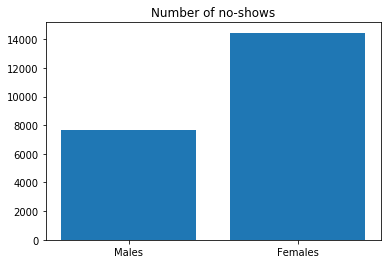

In [854]:
# let us first check absolute numbers

males_noshow=df[(df['gender']=='M') & (df['no_show']==1)]
females_noshow=df[(df['gender']=='F') & (df['no_show']==1)]

y1=len(males_noshow)
y2=len(females_noshow)

y=[x1,x2]

plt.bar(['Males', 'Females'],y)
plt.title('Number of no-shows')

In absolute terms, it seems like Females have a higher number of no-shows than males. However, we know from our data assessment (see above section) that the dataset has a higher number of females than males.  

Hence, it would be a better idea to look at averages (proportions) per gender.

In [855]:
# mean no-show by gender
print("Average no-show for males", df.groupby('gender').no_show.mean()[1])
print("Average no-show for females", df.groupby('gender').no_show.mean()[0])

Average no-show for males 0.19864847303443794
Average no-show for females 0.20238895423738307


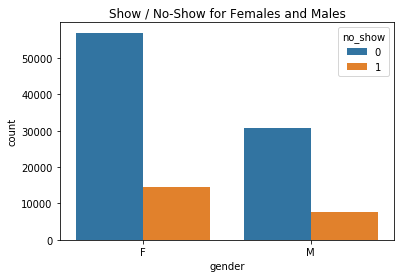

In [856]:
ax=sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show()

We can see the average no-show for females is almost equal to that of males. Though, in absolute terms, more females are attending medical appointments, the proportion of no-show females to total females is the same as that of males; thus, gender does not seem to have a big impact on attendance.   

### Research Question 2: Age vs. Appointment Attendance

Question 2: What is the effect of age on whether a patient shows up for an appointment ?

To explore the effect of age on attendance, I will split age into 4 intervals using the min, 25%, 50%, 75% and max as my bin edges.

In [857]:
# get the mix, 25%, 50%, 75% and max values for age
df[['age']].describe()

,age
count,109887.000000
mean,37.087017
std,23.116657
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,102.000000


In [858]:
# I will create a function which will make the process a little faster 
#(and allows me a little flexibility in case I decide to split the age groups in a different way.
# This function will then be included in another function called "agegroup_means" (see below). 

#Mean_ages creates dataframes with different age intervals. "

def mean_ages(dataframe,x,low,high): #high/low are the interval's extremities
    low=str(low)
    high=str(high)
    string='age>='+low + 'and age>'+ high
    x=dataframe.query(string)
    return x

In [859]:
def agegroup_means(dataframe, column):
    #1st step: creates new dataframes, each with a different age group
    mean_ages(dataframe,low_age,0,18) #mean_ages is the function I created in the cell above
    mean_ages(dataframe,medium_age,18,37)
    mean_ages(dataframe,medium_high_age,37,55)
    mean_ages(dataframe,high_age,55,df['age'].max())
    
    #step 2: calculates the mean of a certain attribute (in this case, "no_show") per dataframe (i.e. per age group), and prints it out
    print("0-17 Yrs, Average "+ column + ":", low_age[column].mean())
    print("18-36 Yrs, Average " + column + ":", medium_age[column].mean())
    print("37-54 Yrs, Average " + column + ":", medium_high_age[column].mean())
    print(">55 Yrs, Average " + column + ":", high_age[column].mean())
    
    #step 3: creates a list of the means calculated in step 2, to be used in our plot later on
    mean1=low_age[column].mean()
    mean2=medium_age[column].mean()
    mean3=medium_high_age[column].mean()
    mean4=high_age[column].mean()

    ages_means=[mean1,mean2,mean3,mean4]
    return ages_means    

In [860]:
age_noshow_means=agegroup_means(df,'no_show')

0-17 Yrs, Average no_show: 0.21849880712057257
18-36 Yrs, Average no_show: 0.2360781990521327
37-54 Yrs, Average no_show: 0.19574848293064295
>55 Yrs, Average no_show: 0.15670941507663436


In [861]:
age_noshow_means

[0.21849880712057257,
 0.2360781990521327,
 0.19574848293064295,
 0.15670941507663436]

Text(0, 0.5, 'Mean No-Show')

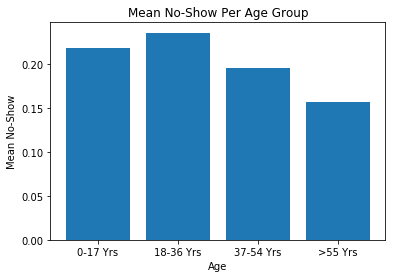

In [862]:
plt.bar(['0-17 Yrs','18-36 Yrs','37-54 Yrs','>55 Yrs'], age_noshow_means)
plt.title('Mean No-Show Per Age Group')
plt.xlabel('Age')
plt.ylabel('Mean No-Show')

We can observe a difference in no-show averages between different age groups. The lowest no-show average was among those aged 55 and higher (note that this means their appointment attendance is the highest). The highest no-show average was among 18-36 year-olds.

### Research Question 3: Health Conditions vs. Appointment Attendance

Question 3: Do patients that are diagnosed with certain conditions (hypertension, alcoholism, handicap, diabetes) tend to show up to their appointments?

To simplify the analysis, I will be creating a new column which returns binary outcomes. It will return 1, if a patient has ANY of the four conditions (hypertension, alcoholism, handicap, or diabetes), and will return 0 if the patient does not have any of the conditions. 

In [863]:
df.loc[(df.hipertension ==1) | (df.alcoholism ==1) | (df.diabetes==1) | (df.handcap==1), 'health_condition'] = "Health Condition"
df.loc[(df.hipertension ==0) & (df.alcoholism ==0) & (df.diabetes==0) & (df.handcap==0), 'health_condition'] = "No Health Condition"

In [864]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,health_condition
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Health Condition
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,No Health Condition


(array([0, 1]), <a list of 2 Text xticklabel objects>)

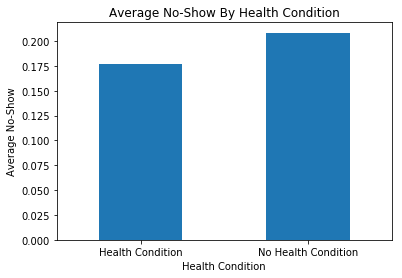

In [865]:
#find average no-show by health condition
df.groupby('health_condition').no_show.mean().plot(kind='bar')
plt.title("Average No-Show By Health Condition")
plt.xlabel('Health Condition')
plt.ylabel('Average No-Show')
plt.xticks(rotation='horizontal')

In the chart above, we can see that people who are not diagnosed with any of the four health conditions have higher average no-show. One explanation could be that people diagnosed with a health condition would take their medical appointment more seriously.

#### Extra Note:

Recall that in "Research Question 2", we found that people above 55 years of age had the lowest no-show rate among all age groups. Let's see if age is related to health condition, which would probably explain why people of older age tend to skip less medical appointments.

In [866]:
df.groupby('health_condition').age.mean()

health_condition
Health Condition       58.020263
No Health Condition    30.515341
Name: age, dtype: float64

The calculation in the above cell shows that the average age for people diagnosed with a health condition is 58 years. This verifies our assumption.  
Below, I will calculate the average health condition per age group. 

In [867]:
df['health_condition']=df['health_condition'].map({'Health Condition':1,'No Health Condition':0})

Text(0.5, 1.0, 'Average Health Condition vs. Age')

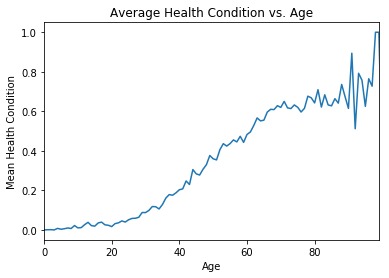

In [868]:
df.groupby('age').health_condition.mean().plot(kind='line')
plt.xlim(0,99)
plt.xlabel('Age')
plt.ylabel('Mean Health Condition')
plt.title('Average Health Condition vs. Age')

We can see that health conditions tend to increase as age increases. To recap:
- Average age for people with health conditions is 58 years, which falls into our "high_age" category. 
- As age increases, so does the probability of being diagnosed with at least one the four health conditions.
- This could explain the outcome of "Research Question 2", which found that people above 55 years have the highest medical appointment attendance.

### Research Question 4: SMS Reminders vs. Appointment Attendance

Question 4: Do SMS reminders decrease the proportion of missed appointments?

I first need to build separate dataframes. One including the patients who received an SMS-reminder and one with those who did not receive an SMS-reminder. As a next step, I will explore the proportions of No-shows within each dataframe.

In [869]:
sms=df[df['sms_received']==1]
no_sms=df[df['sms_received']==0]

Text(0.5, 1.0, 'Percentage of No-shows when SMS was Not Received')

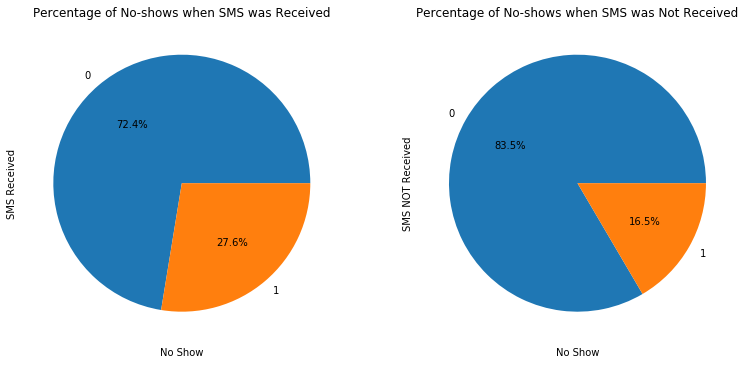

In [870]:
plt.subplot(2,2,1)
sms.groupby('no_show').count()['age'].plot(kind='pie',autopct='%.1f%%',figsize=(13,13))
plt.ylabel('SMS Received')
plt.xlabel('No Show')
plt.title("Percentage of No-shows when SMS was Received")

plt.subplot(2,2,2)
no_sms.groupby('no_show').count()['age'].plot(kind='pie',autopct='%.1f%%',figsize=(13,13))
plt.ylabel('SMS NOT Received')
plt.xlabel('No Show')
plt.title("Percentage of No-shows when SMS was Not Received")

In [871]:
print("Percentage of no-shows when SMS was received is %27.6")
print("Percentage of no-shows when SMS was NOT received is %16.5")

Percentage of no-shows when SMS was received is %27.6
Percentage of no-shows when SMS was NOT received is %16.5


Contrary to expectations, the group who received an SMS reminder had a higher percentage of no-shows compared to the group who did not receive a reminder. SMS reminders do not seem to increase the probability of showing up.

<a id='conclusions'></a>
## Conclusions

My analysis showed that:

- There is no correlation between gender and appointment attendance.
- There is a correlation between age and appointment attendance. The higher the age, the LESS likely that people will NOT show up to their medical appointment. One explanation, as I was able to show, could be that older people have a higher probablity of being diagnosed with one of the four conditions (alcoholism, diabetes, handicap, hypertension). In addition, the average age for people with at least one health condition is 58 years. 
- There is a correlation between having a medical condition and attendance rates. People having at least one of the four conditions tend to show up more to their medical appointments.
- Surprisingly, SMS reminders are not positively correlated with appointment attendance. The group of people who received SMS reminders had a higher percentage of no-shows than the group who did not receive SMS reminders. 




### Limitations

The main limitation in this dataset is that there is an imbalance between gender categories. The number of females is much higher than the number of males in the sample. Having imbalanced data might have caused a biased analysis.

### Notes
The scope of this analysis is limited to exploratory data analysis. Hence, no inferences or causations can be drawn from correlations. The analysis is limited to descriptive statistics and trends . Further statistical tests are required to solidify our findings.  